# Analalyse de la distribution du vocabulaire

## Imports et dépendances

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\balda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer une une liste de stopwords

In [11]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

In [12]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

197 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', 'non'

## Tokeniser

In [13]:
import os

txt_path = "../data/txt/"
texts = []

for filename in os.listdir(txt_path):
    if filename.lower().endswith(".txt"):
        with open(os.path.join(txt_path, filename), "r", encoding="utf-8", errors="ignore") as f:
            texts.append(f.read())

text = " ".join(texts)
print("Nb fichiers chargés:", len(texts))
print("Taille texte:", len(text))

Nb fichiers chargés: 539
Taille texte: 19111153


In [14]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

4769246 words found


In [15]:
words[:10]

['74', '*', 'ANNEE', '—', 'N', '*', '157', '•', 'JOURNAL', 'OUOTtDlîN']

## Calculer la taille du vocabulaire

In [16]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

1597403 words kept (198022 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [17]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

[('tél', 8385),
 ('rue', 6479),
 ('bruxelles', 5661),
 ('juillet', 5535),
 ('mme', 4883),
 ('rossel', 4743),
 ('dem', 4147),
 ('prix', 3855),
 ('congo', 3818),
 ('enf', 3241)]

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

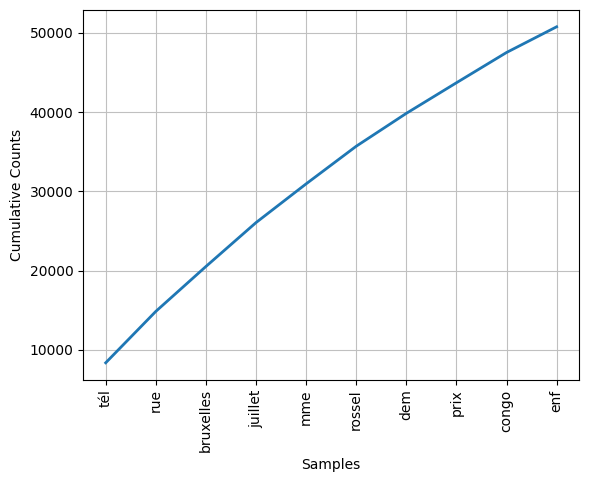

In [18]:
# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

## Détecter les Hapax (mots qui n'apparaissent qu'une fois dans le corpus)

In [19]:
fdist.hapaxes()[:30]

['ouottdlîn',
 'sulu',
 'publtcite',
 'compu',
 'rotxl',
 'ceuvr',
 'rouol',
 'acencc',
 'rivu',
 'brusollas',
 'quee',
 'grartdas',
 'iheuiie',
 'atÿ',
 'tiv',
 'timm',
 'souverainè',
 'vamitié',
 'vvsi',
 'ïmsâ',
 'idevanl',
 'parjlui',
 'avecjin',
 'iik',
 'urai',
 'esclavagiste',
 'wuirv',
 'nrf',
 'frimio',
 'nifr']

## Trouver les mots les plus longs du corpus

In [20]:
n = 30
sorted(voc, key=len, reverse=True)[:n]

['îîtîîîuîîîjîtïjîîttîîîtîîîîîîtîîîîîîîîîîîtîtînîîîtîîîîîîîîîîîtîîîîtmîîîîîîîtîîîîmîttîîîîîîtmîîtîîîîîîmîîll',
 'ïîîiîîîjîîîîîîjîîîîîîsîîtîîîîîtîîïîtîîîjîîîîîîtjîitsîslîsîîîîîiîîîîîîîïtjîtjjitiîttîjîtîmîtttntv',
 'iutttîtttîiiittîtititittîtuiittiiiiiutîitiittîtîitttttîttttttutttiitttiittttttîtttttttttttîttt',
 'iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiim',
 'tttttttttututtttitttiittitmniittttttttiiitttttttttttuuitttttttttxtttttttttœtttttit',
 'îiîîtîîîîîîîîîîntîiîîtîttîîîîîîîîîîatîjîîîîtînîîîîîîîîîjtîîîîtîînîtîîtîtîsjjîîî',
 'murimrktuttttrtutttmrittujkttttîbiitttmtttwujtrttrimttttttntttttttîttht',
 'tuitttttttnitttitiitïitiiitxtitliltiiittittiiiititttuîttttituttnttn',
 'kttttttttttttttttttttttttttîttîîttttttttîîîttîitttîîttttîttttîtt',
 'îjttnnjîtnîjrtkjîîttttrtnîtîjjmmîtîrtttttttrtîtmntnkmmnttttttnn',
 'iimiiiiiiimiiiiiiiiiiiiiiiiiniimiîiiiiiîiiiikimiiiimniiit',
 'kittiitttmttttmtttiiîttiitiiitîttiiiivmtminmtitxtimuîufv',
 'utttttmuîtntitiiiui